In [ ]:
#libraries
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

#importing data
df_raw = pd.read_csv('/application_train.csv', index_col=0)

#exploring data
df_raw.head()
df_raw.shape

print('\nCounting total missing value:')
print(df_raw.isnull().sum().sum())
   
df_raw1 = df_raw.dropna(axis=1)

cols_to_drop = ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION']

df = df_raw1.drop(cols_to_drop, axis=1)

print('Ukuran sebelum explore:', df_raw.shape) 
print('Ukuran sesudah explore:', df.shape)


#Cleaning, preprocessing, feature engineering

print('\nConvert feature/column:')
LE = LabelEncoder()
df['NAME_CONTRACT_TYPE'] = LE.fit_transform(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'] = LE.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = LE.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = LE.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_INCOME_TYPE'] = LE.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = LE.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = LE.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = LE.fit_transform(df['NAME_HOUSING_TYPE'])
df['WEEKDAY_APPR_PROCESS_START'] = LE.fit_transform(df['WEEKDAY_APPR_PROCESS_START'])
df['ORGANIZATION_TYPE'] = LE.fit_transform(df['ORGANIZATION_TYPE'])



Counting total missing value:
9152465
Ukuran sebelum explore: (307511, 121)
Ukuran sesudah explore: (307511, 51)

Convert feature/column:


In [ ]:
#Define target variable
df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


Correlation Check:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':



check categorical values:


TARGET                            2
NAME_CONTRACT_TYPE                2
CODE_GENDER                       3
FLAG_OWN_CAR                      2
FLAG_OWN_REALTY                   2
CNT_CHILDREN                     15
AMT_INCOME_TOTAL               2548
AMT_CREDIT                     5603
NAME_INCOME_TYPE                  8
NAME_EDUCATION_TYPE               5
NAME_FAMILY_STATUS                6
NAME_HOUSING_TYPE                 6
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    17460
DAYS_EMPLOYED                 12574
DAYS_REGISTRATION             15688
DAYS_ID_PUBLISH                6168
FLAG_MOBIL                        2
FLAG_WORK_PHONE                   2
FLAG_CONT_MOBILE                  2
FLAG_PHONE                        2
FLAG_EMAIL                        2
REGION_RATING_CLIENT              3
WEEKDAY_APPR_PROCESS_START        7
HOUR_APPR_PROCESS_START          24
REG_CITY_NOT_LIVE_CITY            2
REG_CITY_NOT_WORK_CITY            2
ORGANIZATION_TYPE           

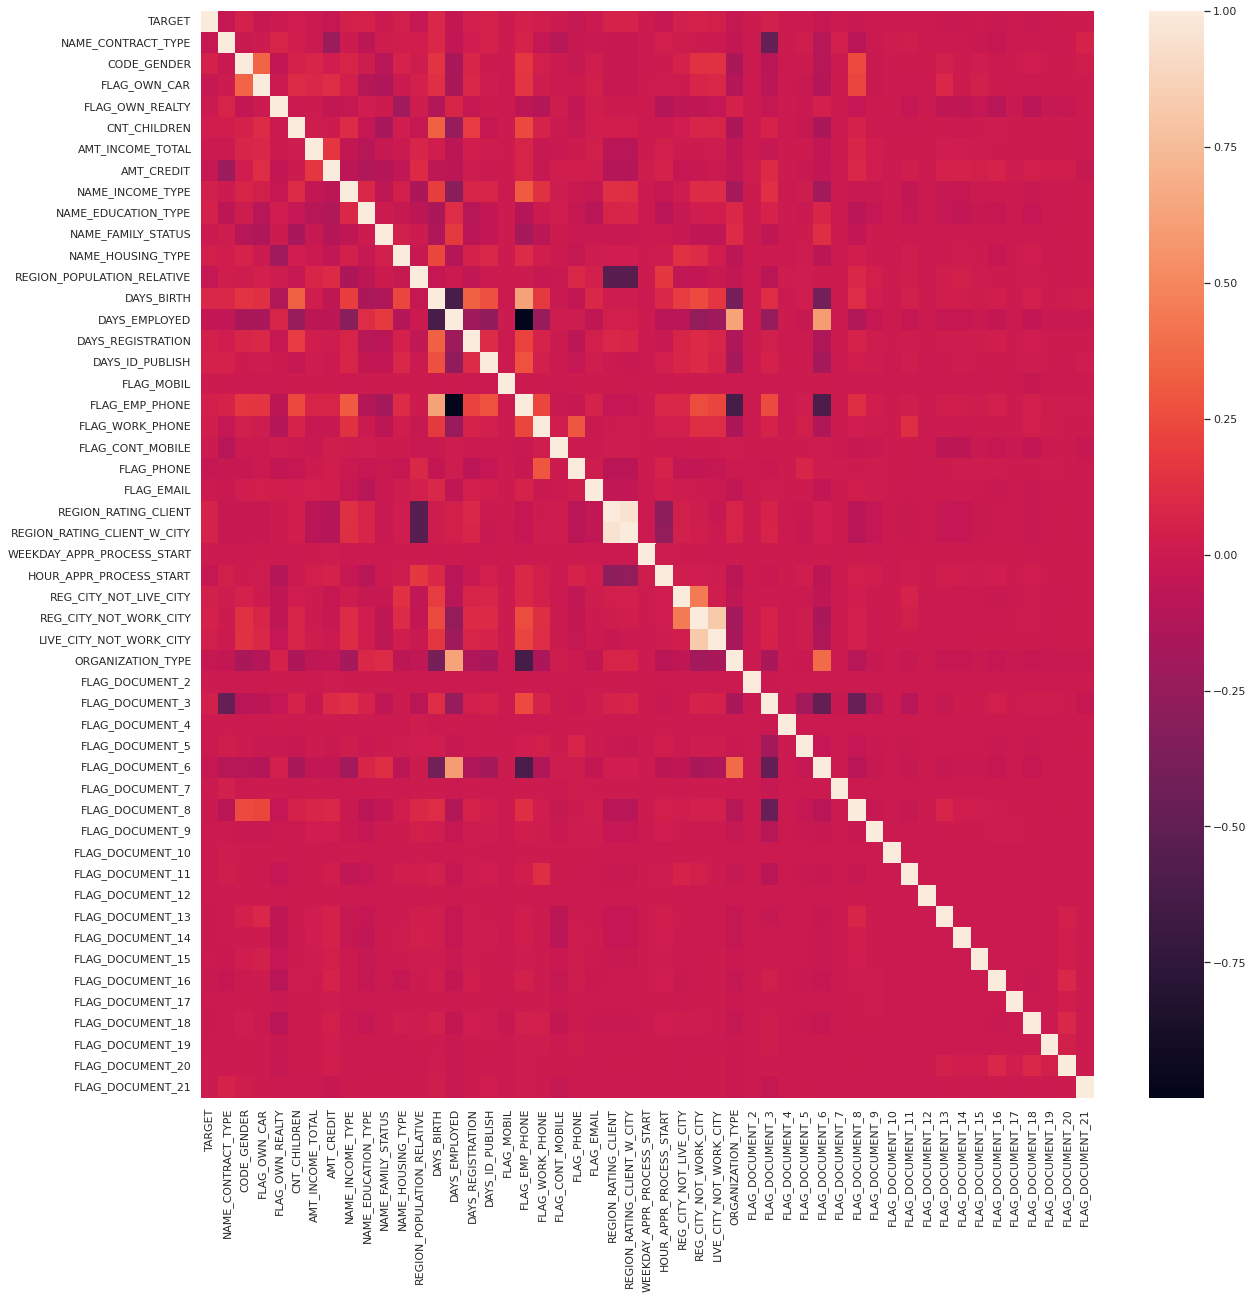

In [ ]:
#EDA

print('\nCorrelation Check:')
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]
df.drop(to_drop_hicorr, axis=1, inplace=True)

print('\ncheck categorical values:')
df.select_dtypes(include='object').nunique()
df.select_dtypes(exclude='object').nunique()



In [ ]:
for col in df.columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')
df.drop('FLAG_DOCUMENT_2', axis=1, inplace=True)
df.drop(df.loc[:, 'FLAG_DOCUMENT_4':'FLAG_DOCUMENT_21'].columns, axis = 1, inplace=True)


0    91.927118
1     8.072882
Name: TARGET, dtype: float64


0    90.478715
1     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


0    65.834393
1    34.164306
2     0.001301
Name: CODE_GENDER, dtype: float64


0    65.989184
1    34.010816
Name: FLAG_OWN_CAR, dtype: float64


1    69.367275
0    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64


135000.0    11.625600
112500.0    10.087119
157500.0     8.635789
180000.0     8.038412
90000.0      7.311283
              ...    
117324.0     0.000325
64584.0      0.000325
142897.5     0.000325
109170.0     0.000325
113062.5     0.000325
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: float64


450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0

In [ ]:
#Feature Scalling and Transformation
print('\nStandardization:')
numerical_cols = [col for col in df.columns.tolist() if col not in ['TARGET']]
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

print('\nTransformed Dataframe:')
df_model = pd.concat([df['TARGET'].reset_index(drop=True), std.reset_index(drop=True)], axis=1)
df_model.head(5)



Standardization:

Transformed Dataframe:


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_3
0,1,-0.324395,1.388015,-0.717914,0.664531,-0.577538,0.142129,-0.478095,0.915580,0.625006,1.306965,-0.305298,-0.149452,1.506880,-0.456215,0.379837,0.579154,0.001803,-0.499013,0.043245,1.599337,-0.245215,-0.103064,1.353458,-0.631821,-0.291208,-0.547236,-1.194830,0.639065
1,0,-0.324395,-0.720370,-0.717914,-1.504820,-0.577538,0.426792,1.725450,-0.263424,-1.684905,-0.404071,-0.305298,-1.252750,-0.166821,-0.460115,1.078697,1.790855,0.001803,-0.499013,0.043245,1.599337,-0.245215,-2.067573,-0.972656,-0.325620,-0.291208,-0.547236,0.466663,0.639065
2,0,3.082659,1.388015,1.392925,0.664531,-0.577538,-0.427196,-1.152888,0.915580,0.625006,1.306965,-0.305298,-0.783451,-0.689509,-0.453299,0.206116,0.306869,0.001803,2.003956,0.043245,1.599337,-0.245215,-0.103064,-0.972656,-0.938022,-0.291208,-0.547236,-0.901625,-1.564786
3,0,-0.324395,-0.720370,-0.717914,0.664531,-0.577538,-0.142533,-0.711430,0.915580,0.625006,-1.259589,-0.305298,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,0.001803,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,1.353458,1.511587,-0.291208,-0.547236,-1.194830,0.639065
4,0,-0.324395,1.388015,-0.717914,0.664531,-0.577538,-0.199466,-0.213734,0.915580,0.625006,1.306965,-0.305298,0.563570,-0.892535,-0.473210,0.191639,-0.307263,0.001803,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,0.423012,-0.325620,-0.291208,1.827367,0.368928,-1.564786


In [ ]:
#Modelling

print('\nTrain-Test Split:')
X = df_model.drop('TARGET', axis=1)
y = df_model['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape



Train-Test Split:


((246008, 28), (61503, 28))

In [ ]:
print('\nTraining:')
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features


Training:


,feature,importance
12,DAYS_BIRTH,0.181927
8,NAME_EDUCATION_TYPE,0.147672
13,DAYS_EMPLOYED,0.119317
1,CODE_GENDER,0.093071
7,NAME_INCOME_TYPE,0.076027
21,REGION_RATING_CLIENT,0.066347
15,DAYS_ID_PUBLISH,0.049418
6,AMT_CREDIT,0.042664
27,FLAG_DOCUMENT_3,0.039963
25,REG_CITY_NOT_WORK_CITY,0.031496


In [ ]:
#Validation
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index




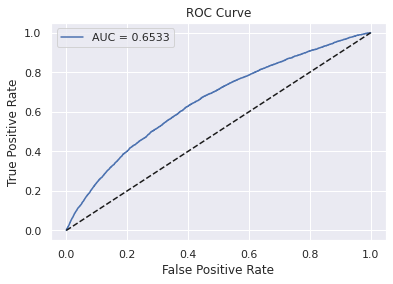

In [ ]:
#AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.2306')

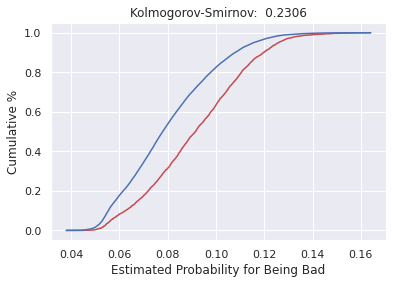

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

In [ ]:
# Pemodelan Permasalahan Klasifikasi dengan Logistic Regression
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

pd.crosstab(y_test,y_pred)

Training Accuracy : 0.9188278429969757
Testing Accuracy : 0.9210607612636782

Confusion matrix
[[56648     0]
 [ 4855     0]]

Classification report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.00      0.00      0.00      4855

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


col_0,0
TARGET,
0,56648
1,4855
